## 1. Import required packages and waterway network under study

In [1]:
import networkx as nx
import pandas as pd
import pickle
import matplotlib.pyplot as plt
G = pickle.load( open('data/cleaned_network.p','rb'))

pos_dict = {}
for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])

## 2. Define sub-modelling problem
Harbours (where a charging station may be place) are almost never directly passed by ships on ongoing routes.
Hence the following questions where raised:
- Which locations may be considered to place charging stations ?
- How to know when a potential location is passed (because not directly on route) ?

The overall goal is thus to create a initial list with nodes, on ongoing routes that lead to harbours. This list may be changed based
on new insights later on. Using this list is a simplification of the problem, ideally the time and distance to travel in and out of a
harbour should also be considered.

## 3. Approach
First branch point towards a port is taken as the entrance to a port. The port itself thus may still be a few nodes further inside
(see picture below). This seems a reasonable assumption, as a harbour also often has more than one dock (also see picture below).


![Tilburg](Tilburg.PNG)

Note that in the picture below, node 8861748 is thus considered to place a charging station, instead of node 8862372.
In essence this won't make much of a difference, as the inland node is always quite near, and the distance is not very significant.

All links that go towards a harbour, have a specific name tag: 'Vaarwegvak van 0 tot 0 - H'
The first (most inland) node of a port is usually connected to a ongoing route, the others are not connected to such a node.
These nodes, can thus be recognised by this tag in combination of a degree higher than or equal to three.
Hence, all nodes are dropped if they have a degree smaller than 3 (see code below).

### Process that resulted in the current pickled list with harbour nodes:

In [2]:
#Get data from df
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [3]:
# berth nodes of which we want to find the intersection with main route
berth_nodes = df_nodes.loc[df_nodes.n.str.contains('Berth')].index

In [4]:
# add degree to dataframe
df_links['degree'] = df_links.source.apply(lambda x: G.degree[x])

In [12]:
len(list(berth_nodes))

279

In [10]:
df_links.loc[df_links.target.str.contains("Berth")]

,source,target,Length,GeneralWidth,GeneralHeight,GeneralLength,length_deg,StartJunctionId,EndJunctionId,subgraph,...,SeaFairingDepth,length_m,Code,Name,geometry,Wkt,CoupledDepth,CoupledLength,Id_navigability,degree
27,Berth57,Berth58,15.628,15.5,NaN,137.5,NaN,Berth57,Berth58,0,...,NaN,150.215635,II,Vaarwegvak van 0 tot 16 - H,"{'type': 'LineString', 'coordinates': ((5.8524...",LINESTRING (5.852460202020669 51.1773830730739...,NaN,NaN,19954.0,2
31,Berth51,Berth50,18.066,11.5,NaN,110.0,NaN,Berth51,Berth50,0,...,NaN,239.909307,V_A,Vaarwegvak van 16 tot 34 - H,"{'type': 'LineString', 'coordinates': ((6.5883...",LINESTRING (6.588369178458311 52.2251084316050...,NaN,NaN,29301.0,2
36,Berth73,Berth74,0.432,NaN,NaN,NaN,NaN,Berth73,Berth74,0,...,7.0,144.668021,VI_B,Vaarwegvak van 0 tot 0 - H,"{'type': 'LineString', 'coordinates': ((3.8288...",LINESTRING (3.8288388739134156 51.319285651053...,NaN,NaN,49182.0,2
60,Berth201,Berth202,5.222,14.0,NaN,137.5,NaN,Berth201,Berth202,0,...,NaN,228.892207,V_A,Vaarwegvak van 0 tot 5 - H,"{'type': 'LineString', 'coordinates': ((5.6966...",LINESTRING (5.696619012306433 50.8530930499691...,NaN,NaN,52183.0,1
62,B29263_B,Berth273,1.894,NaN,NaN,NaN,NaN,B29263_B,Berth273,0,...,NaN,2478.566001,V_A,Vaarwegvak van 2 tot 4 - H,"{'type': 'LineString', 'coordinates': ((4.2521...",LINESTRING (4.252115657306563 51.5066654931499...,NaN,NaN,4100.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,8863386,Berth24,0.819,NaN,NaN,NaN,NaN,8863386,Berth24,0,...,NaN,346.340677,V_A,Vaarwegvak van 0 tot 0 - H,"{'type': 'LineString', 'coordinates': ((4.6251...","LINESTRING (4.62517790176572 52.4696419069892,...",NaN,NaN,47873.0,2
3272,Berth120,Berth121,3.362,23.5,NaN,200.0,NaN,Berth120,Berth121,0,...,NaN,178.549737,VI_B,Vaarwegvak van 69 tot 73 - H,"{'type': 'LineString', 'coordinates': ((5.4498...",LINESTRING (5.449800047404803 51.9087717019321...,NaN,NaN,15948.0,2
3282,8867489,Berth275,0.611,16.0,NaN,140.0,NaN,8867489,Berth275,0,...,NaN,403.613275,V_A,Vaarwegvak van 0 tot 0 - H,"{'type': 'LineString', 'coordinates': ((3.8246...","LINESTRING (3.82464265412123 51.3188974436157,...",NaN,NaN,44403.0,4
3305,Berth276,Berth275,0.611,16.0,NaN,140.0,NaN,Berth275,Berth276,0,...,NaN,130.833623,V_A,Vaarwegvak van 0 tot 0 - H,"{'type': 'LineString', 'coordinates': ((3.8258...","LINESTRING (3.82587959039649 51.3222241757137,...",NaN,NaN,44403.0,2


In [43]:
#visual inspection of the network showed that all harbour related nodes are tagged: ‘Vaarwegvak van 0 tot 0 - H’
#However, these are many nodes, and each harbour often consists of at least a couple.
df_links.loc[(df_links.Name=='Vaarwegvak van 0 tot 0 - H')]



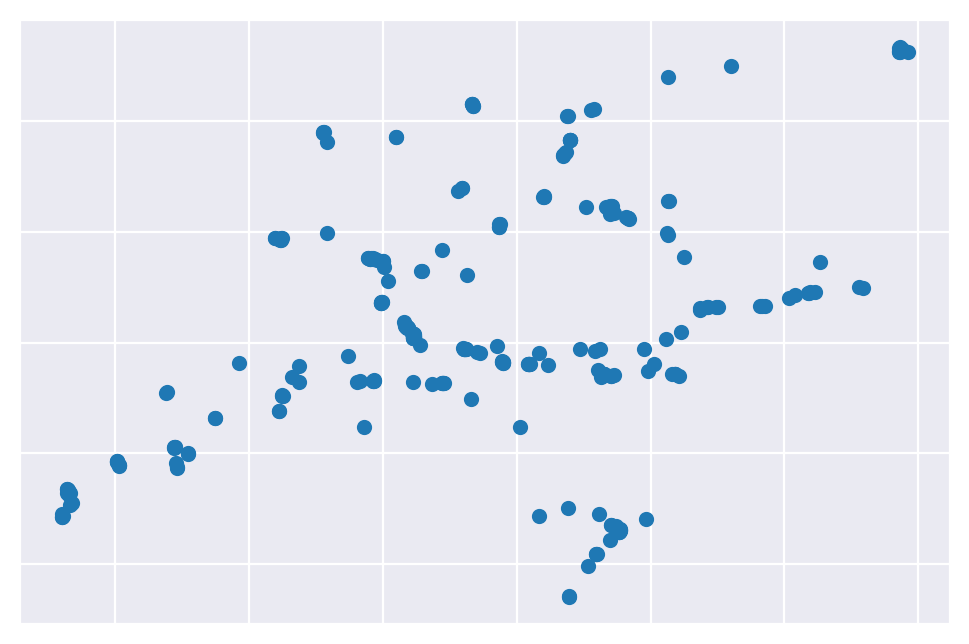

In [45]:
plt.subplots(dpi=200)
nx.draw_networkx_nodes(G, pos_dict, berth_nodes, node_size=20)

## Finding harbour exits on main routes

In [46]:
# Use end junction attribute to find correct nodes?
df_harbour_exits = df_links.loc[df_links.EndJunctionId.str.contains('Berth')]
#make additional column with degree
df_harbour_exits['degree'] = df_harbour_exits.source.apply(lambda x: G.degree[x])

C:\Users\Fabia\AppData\Local\Temp\ipykernel_2472\4055930897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harbour_exits['degree'] = df_harbour_exits.source.apply(lambda x: G.degree[x])


In [47]:
possible_hns = list(df_harbour_exits.loc[df_harbour_exits.degree>2].source)

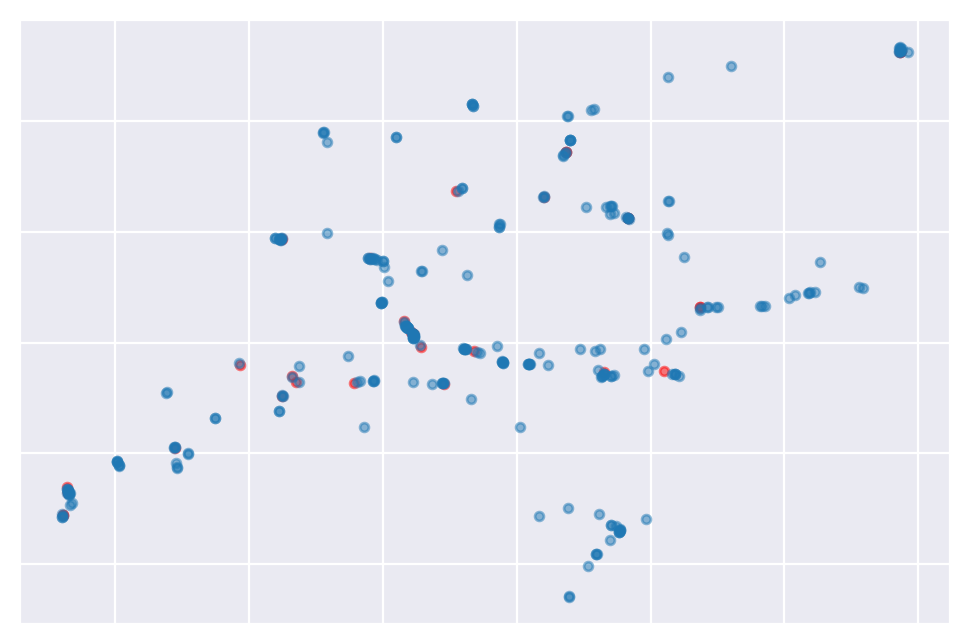

In [54]:
H = G.subgraph(possible_hns)

plt.subplots(dpi=200)
#draw intersections
nx.draw_networkx_nodes(G, pos_dict, possible_hns, node_size=10, node_color='red', alpha=0.5)

#draw harbours
nx.draw_networkx_nodes(G, pos_dict, berth_nodes, node_size=10, alpha=0.5)

In [ ]:
# not all on ongoing route, what if: select nodes with degree higher than 3
# node with degree higher than 0 is harbour exit

In [6]:
#first collect degrees
degrees = G.degree

harbour_links = df_links.loc[(df_links.Name=='Vaarwegvak van 0 tot 0 - H')]
harbour_links.reset_index(inplace = True, drop = True)

for index, source in enumerate(harbour_links.source):
    if degrees[source] < 3:
        harbour_links.drop(index, inplace=True)

harbour_links.reset_index(inplace = True, drop = True)

harbour_links
#looks OK for now! Maybe still filter based on depth or something like that later on

C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(index, inplace=True)
C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(index, inplace=True)
C:\Users\Fabia\AppData\Local\Temp\ipykernel_14096\4039122636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harbour_links.drop(i

,source,target,lat_p50,Code,nap_p10,nap_p5,CoupledDepth,Id_navigability,lat_p0,Length,...,GeneralWidth,PushedWidth,WidePushedLength,lat_mean,SeaFairingHeight,GeneralLength,Name,WidePushedWidth,PushedDepth,CoupledWidth
0,8861581,8863189,NaN,_0,NaN,NaN,NaN,25496406.0,NaN,0.371,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
1,8860954,8864050,NaN,VI_C,NaN,NaN,NaN,10916.0,NaN,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
2,8865802,8862540,NaN,V_A,NaN,NaN,NaN,8090.0,NaN,0.465,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
3,8864595,8864137,NaN,VI_C,NaN,NaN,NaN,42146.0,NaN,0.104,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
4,8864595,8862678,NaN,VI_C,NaN,NaN,NaN,53505.0,NaN,0.628,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,8868094,B51576_A,NaN,II,NaN,NaN,NaN,6367.0,NaN,0.243,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
811,S46058_A,S46058_A,NaN,V_A,2.676762,2.676762,NaN,25487825.0,NaN,0.708,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
812,S46058_A,S46058_B,NaN,V_A,2.713659,2.713659,NaN,25487825.0,NaN,0.708,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN
813,22638160,Berth48,NaN,II,-4.775776,-4.816955,NaN,25496287.0,NaN,0.221,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaarwegvak van 0 tot 0 - H,NaN,NaN,NaN


In [7]:
print('# harbour links', len(harbour_links))
# number of unique harbour_exits for whole network looks somewhat reasonable

# harbour links 815


In [8]:
#unique sources should be on ongoing routes
harbour_exits = list(harbour_links.source.unique())
print(len(harbour_exits))

649


In [9]:
# pick list to use in program
pickle.dump( harbour_exits, open( "data/harbour_exits.p", "wb" ) )